# 🤖 Telecom X - Parte 2: Modelo Predictivo de Churn

## Introducción
Este *notebook* se enfoca en la segunda fase del proyecto: la construcción de un modelo de machine learning utilizando el conjunto de datos limpio y preparado de la Parte 1. Este estudio ha sido elaborado con el máximo rigor profesional, aplicando los conocimientos y las técnicas adquiridas durante mi formación en Alura Latam. Como en la primera parte, para darle un enfoque didáctico y para transparentar mi razonamiento aplicado, cada una de mis acciones/decisiones; las presentare detallando su:

* **Objetivo**,
* **Método** y
* **Justificación**.

El análisis culminará con la selección del mejor modelo y la identificación de las variables más influyentes en su toma de decisiones.

## 🛠️ Preparación de los Datos:

### 🎯 1.1. Carga de Librerías y Extracción del Archivo Tratado

**Objetivo**: Cargare las librerías esenciales para el modelado y el archivo telecom_churn_cleaned_data.csv que contiene los datos limpios de la Parte 1.

**Método**: Importare las librerías de `pandas`, `sklearn`, `imblearn`, etc., y se usará la función `pd.read_csv()` para cargar los datos en un DataFrame.

**Justificación**: Este es el punto de partida para asegurar que tenemos las herramientas y los datos correctos listos.

In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Herramientas de Modelado y Preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Manejo de Desbalance
from imblearn.over_sampling import SMOTE

# Configuraciones
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

print("Librerías importadas exitosamente.")

# Cargar el dataset
try:
    df = pd.read_csv('telecom_churn_cleaned_data.csv')
    print("\nDatos limpios cargados exitosamente.")
    print("Dimensiones:", df.shape)
except FileNotFoundError:
    print("Error: Asegúrate de que el archivo 'telecom_churn_cleaned_data.csv' esté en el mismo directorio.")

df.head()

Librerías importadas exitosamente.

Datos limpios cargados exitosamente.
Dimensiones: (7043, 22)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Cuentas_Diarias
0,0002-ORFBO,0,1,0,1,1,9,One year,1,Mailed check,65.6,593.30,1,No,DSL,No,Yes,No,Yes,Yes,No,2.16
1,0003-MKNFE,0,0,0,0,0,9,Month-to-month,0,Mailed check,59.9,542.40,1,Yes,DSL,No,No,No,No,No,Yes,1.97
2,0004-TLHLJ,1,0,0,0,0,4,Month-to-month,1,Electronic check,73.9,280.85,1,No,Fiber optic,No,No,Yes,No,No,No,2.43
3,0011-IGKFF,1,0,1,1,0,13,Month-to-month,1,Electronic check,98.0,1237.85,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,3.22
4,0013-EXCHZ,1,1,1,1,0,3,Month-to-month,1,Mailed check,83.9,267.40,1,No,Fiber optic,No,No,No,Yes,Yes,No,2.76


### 🎯 1.2. Eliminación de Columnas Irrelevantes

**Objetivo**: Eliminar la columna `customerID` del DataFrame.

**Método**: Se utilizará el método `.drop()` de `Pandas`, especificando`axis=1` para indicar que es una columna.

**Justificación**: La columna `customerID` no contiene información sobre el comportamiento del cliente y su inclusión podría introducir ruido.

In [15]:
# Eliminación de la columna 'customerID'
df.drop('customerID', axis=1, inplace=True)

print("Columna 'customerID' eliminada. Nuevas dimensiones:", df.shape)
df.head()

Columna 'customerID' eliminada. Nuevas dimensiones: (7043, 21)


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Cuentas_Diarias
0,0,1,0,1,1,9,One year,1,Mailed check,65.6,593.30,1,No,DSL,No,Yes,No,Yes,Yes,No,2.16
1,0,0,0,0,0,9,Month-to-month,0,Mailed check,59.9,542.40,1,Yes,DSL,No,No,No,No,No,Yes,1.97
2,1,0,0,0,0,4,Month-to-month,1,Electronic check,73.9,280.85,1,No,Fiber optic,No,No,Yes,No,No,No,2.43
3,1,0,1,1,0,13,Month-to-month,1,Electronic check,98.0,1237.85,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,3.22
4,1,1,1,1,0,3,Month-to-month,1,Mailed check,83.9,267.40,1,No,Fiber optic,No,No,No,Yes,Yes,No,2.76


### 🎯 1.3. Encoding

**Objetivo**: Transformar todas las variables categóricas de texto a un formato numérico para que sean compatibles con los algoritmos de machine learning.

**Método**: Aplicare la técnica de `One-Hot Encoding` utilizando la función `pd.get_dummies` de `Pandas` con el parámetro `drop_first=True`.

**Justificación**: Los modelos de machine learning requieren que todas las variables de entrada sean numéricas. pd.get_dummies es un método directo para crear columnas binarias (0/1) para cada categoría, el uso de drop_first=True es una práctica estándar para evitar la multicolinealidad (información redundante) entre las nuevas columnas generadas, lo cual es beneficioso la Regresión Logística.

In [16]:
# Aplico One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

print("Variables categóricas transformadas a formato numérico.")
print("Nuevas dimensiones:", df_encoded.shape)

print("\nTipos de datos después del encoding:")
df_encoded.info()

Variables categóricas transformadas a formato numérico.
Nuevas dimensiones: (7043, 32)

Tipos de datos después del encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7043 non-null   int64  
 1   gender                                 7043 non-null   int64  
 2   SeniorCitizen                          7043 non-null   int64  
 3   Partner                                7043 non-null   int64  
 4   Dependents                             7043 non-null   int64  
 5   tenure                                 7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   Charges.Monthly                        7043 non-null   float64
 8   Charges.Total                          7043 non-null   float64
 9   PhoneService   


### 🎯 1.4. Verificación de la Proporción de Cancelación (Churn)

**Objetivo**: Calcular y visualizar la proporción de clientes que cancelaron (`Churn`) en relación con los que permanecieron activos para confirmar si existe un desbalance de clases.

**Método**: Utilizare el método `.value_counts(normalize=True)` de `Pandas` sobre la columna `Churn` del DataFrame original (df) para obtener los porcentajes de cada clase.

**Justificación**: Con esto entendere la distribución de nuestra variable objetivo.

In [20]:
# Uso el DataFrame 'df' (antes del encoding) para una lectura más clara de la proporción
churn_proportion = df['Churn'].value_counts(normalize=True) * 100

print("Proporción de Clases en la Variable 'Churn':")
print(round(churn_proportion, 2))

# Visualización rápida para ilustrar el desbalance
fig = px.pie(names=['No Churn', 'Churn'],
             values=df['Churn'].value_counts().values,
             title='Distribución de Clases Antes del Balanceo',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

Proporción de Clases en la Variable 'Churn':
Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


Análisis: Como ya sabiamos, el `~74%` de los clientes no cancelaron, mientras que el `~26%` sí lo hizo.



### 🎯 1.5. Balanceo de Clases

**Objetivo**: Corregir el desbalance de clases en nuestro conjunto de datos para asegurar que los modelos de machine learning aprendan de manera equitativa de ambas clases (`Churn` y `No Churn`).

**Método**: Aplicare la técnica de sobremuestreo `SMOTE` al DataFrame ya codificado (`df_encoded`).

**Justificación**: El balanceo de clases es un paso fundamental para evitar que el modelo se vuelva "*perezoso*" y prediga siempre la **clase mayoritaria** para obtener una alta precisión (**accuracy**) engañosa.

In [21]:
# Separo X e y del dataframe codificado
# La columna objetivo es 'Churn', que ya es numérica (0/1) desde la parte 1.
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("--- Distribución de Clases ---")
print("Dataset original:")
print(y.value_counts())
print("\nDataset después de SMOTE:")
print(y_resampled.value_counts())
print("\nNuevas dimensiones de X (balanceado):", X_resampled.shape)

--- Distribución de Clases ---
Dataset original:
Churn
0    5174
1    1869
Name: count, dtype: int64

Dataset después de SMOTE:
Churn
0    5174
1    5174
Name: count, dtype: int64

Nuevas dimensiones de X (balanceado): (10348, 31)


## 📈 2. Correlación y Selección de Variables

### 🎯 2.1. Análisis de Correlación

**Objetivo**: Identificar las relaciones lineales entre las variables numéricas del dataset, con enfoque en cómo se correlacionan con la variable objetivo, `Churn`.

**Método**: Calculare la matriz de correlación de Pearson para el DataFrame balanceado (`X_resampled` y `y_resampled`). Posteriormente, hare una visual de esta matriz como un mapa de calor.

**Justificación**: La matriz de correlación nos permite, detectar posible multicolinealidad y nos da una primera idea cuantitativa de qué variables tienen la relación estadística más fuerte.

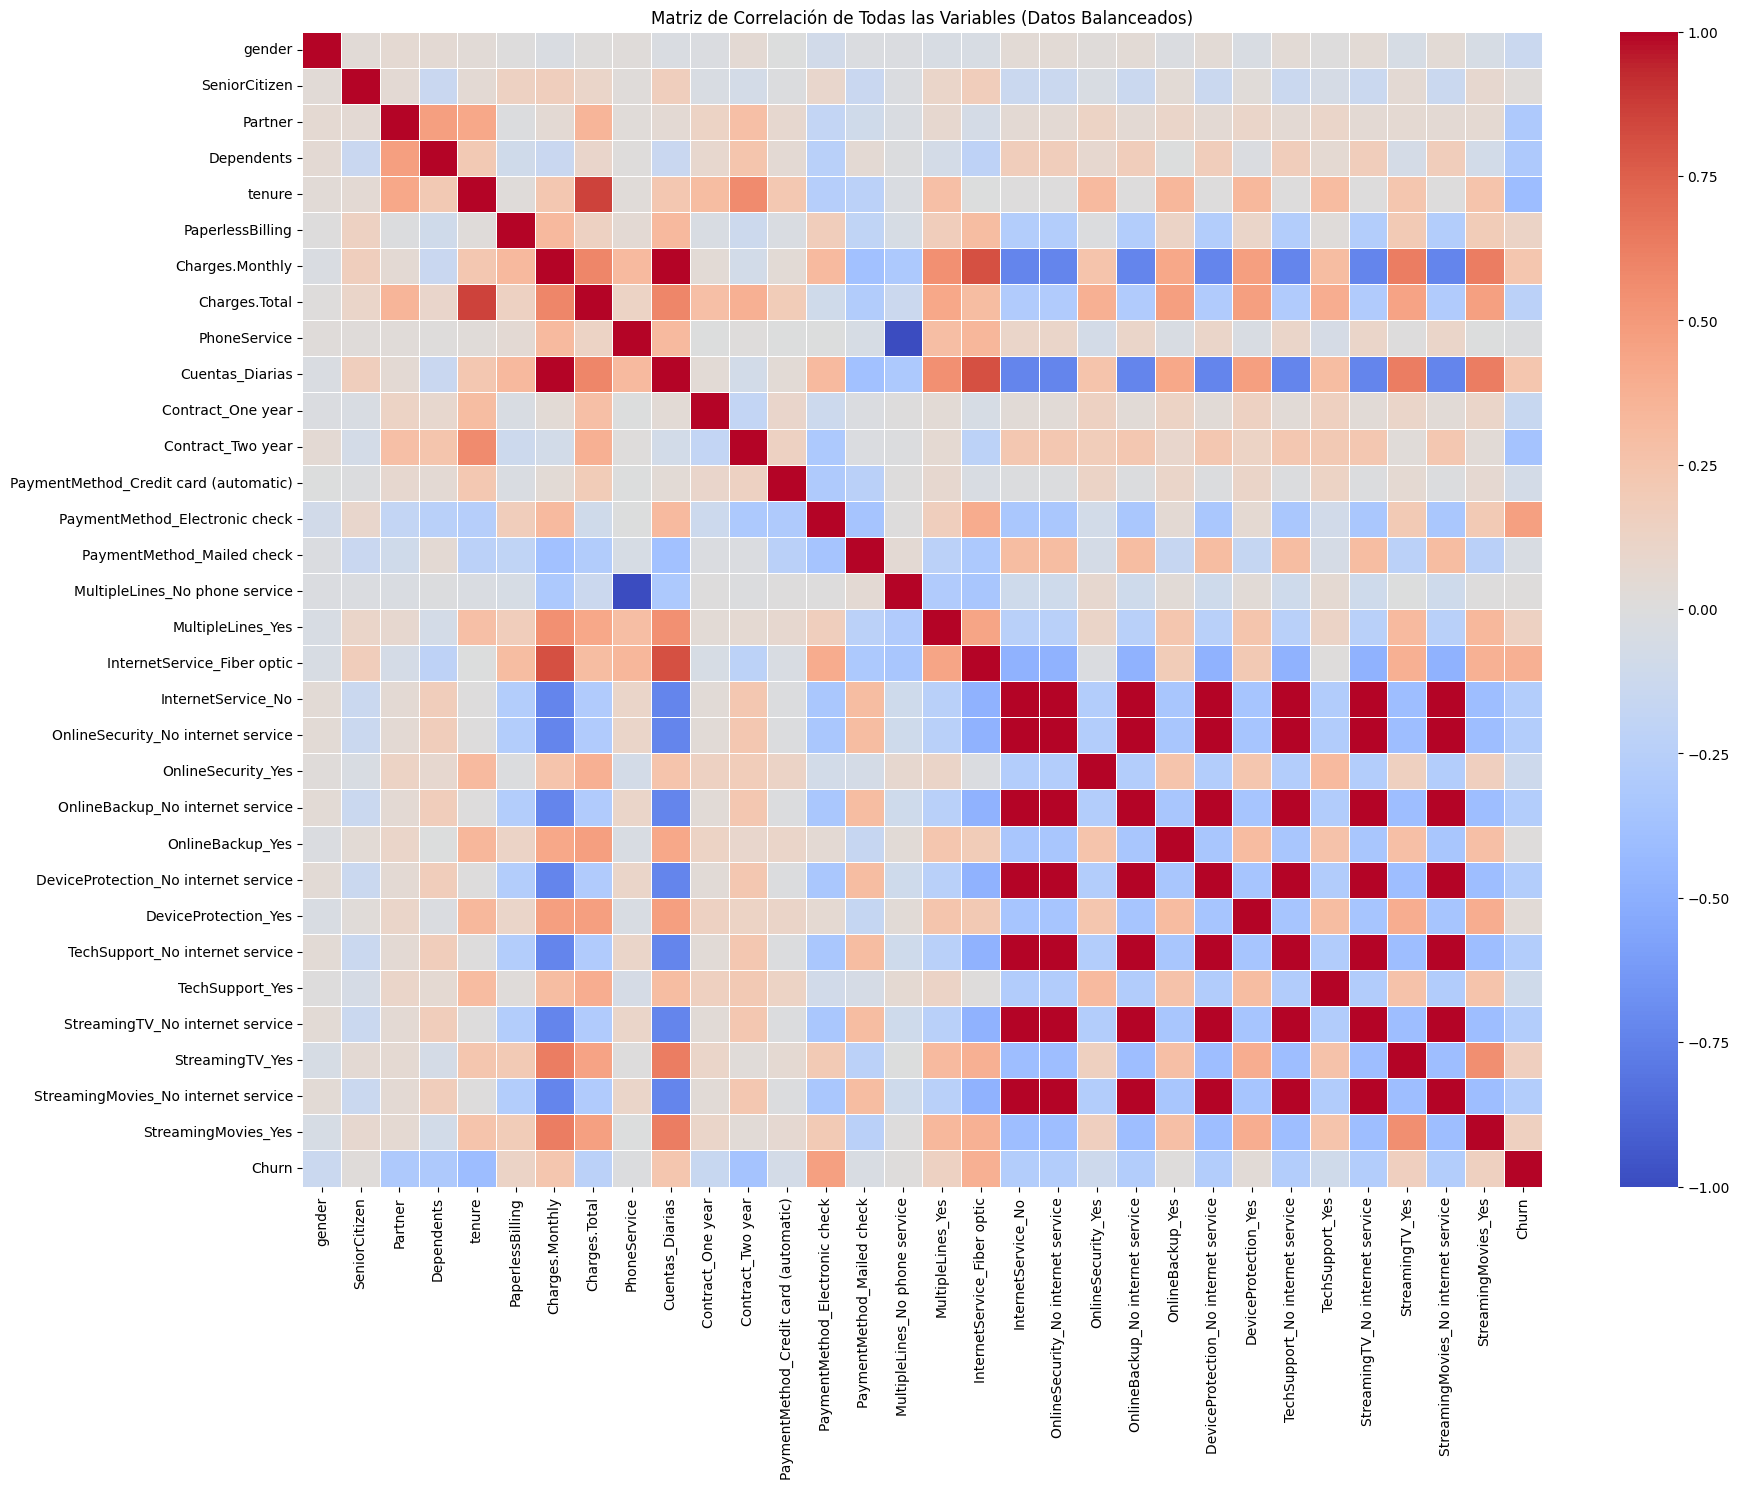


--- Correlación de Variables con Churn ---
Top 10 más correlacionadas positivamente con Churn (tienden a irse):
Churn                             1.000000
PaymentMethod_Electronic check    0.461117
InternetService_Fiber optic       0.378470
Charges.Monthly                   0.235592
Cuentas_Diarias                   0.235526
StreamingTV_Yes                   0.161550
StreamingMovies_Yes               0.153767
MultipleLines_Yes                 0.143699
PaperlessBilling                  0.124900
DeviceProtection_Yes              0.031686
Name: Churn, dtype: float64

Top 10 más correlacionadas negativamente con Churn (tienden a quedarse):
InternetService_No                     -0.279966
OnlineSecurity_No internet service     -0.279966
DeviceProtection_No internet service   -0.279966
TechSupport_No internet service        -0.279966
StreamingTV_No internet service        -0.279966
StreamingMovies_No internet service    -0.279966
Partner                                -0.307770
Dependents  

In [22]:
# Uno temporalmente X_resampled y y_resampled
df_resampled = X_resampled.copy()
df_resampled['Churn'] = y_resampled

# Calculo la matriz de correlación
correlation_matrix = df_resampled.corr()

# Mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación de Todas las Variables (Datos Balanceados)')
plt.show()

# Correlaciones directas con 'Churn'
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)
print("\n--- Correlación de Variables con Churn ---")
print("Top 10 más correlacionadas positivamente con Churn (tienden a irse):")
print(churn_correlation.head(10))
print("\nTop 10 más correlacionadas negativamente con Churn (tienden a quedarse):")
print(churn_correlation.tail(10))

#### 💡 Análisis:

Correlaciones Positivas (Factores de Riesgo):

* **PaymentMethod_Electronic check** tiene la correlación positiva más fuerte (+0.46). Esto confirma cuantitativamente que el uso de este método de pago es un fuerte indicador de que un cliente podría cancelar.

* **InternetService_Fiber optic** (+0.38) y **Charges.Monthly** (+0.24) le siguen, reforzando la idea de que los planes más caros y premium están asociados con un mayor riesgo de evasión.

Correlaciones Negativas (Factores de Retención):

* **tenure** (antigüedad) tiene la correlación negativa más fuerte (-0.41). Esto confirma que a mayor antigüedad, menor es la probabilidad de cancelación.

* **Contract_Two year** (-0.37) es el segundo factor de protección más fuerte, validando que los contratos a largo plazo son clave para la retención de clientes.

### 🎯 2.2. Análisis Dirigido

**Objetivo**: Investigar visualmente y con mayor profundidad la relación entre variables específicas como `tenure`, `Charges.Total` y la variable `Churn`.

**Método**: Utilizare diagramas de caja (`boxplots`) para comparar la distribución de estas variables numéricas entre los clientes que cancelaron y los que no. Para este análisis visual, usare el dataset original (antes del balanceo con SMOTE) para observar el comportamiento real de los clientes.

**Justificación**: Un boxplot puede revelar diferencias claras en la mediana, la dispersión y la presencia de valores atípicos entre los dos grupos de clientes (`Churn` vs. `No Churn`), validando así los hallazgos de mi análisis en la Parte 1.

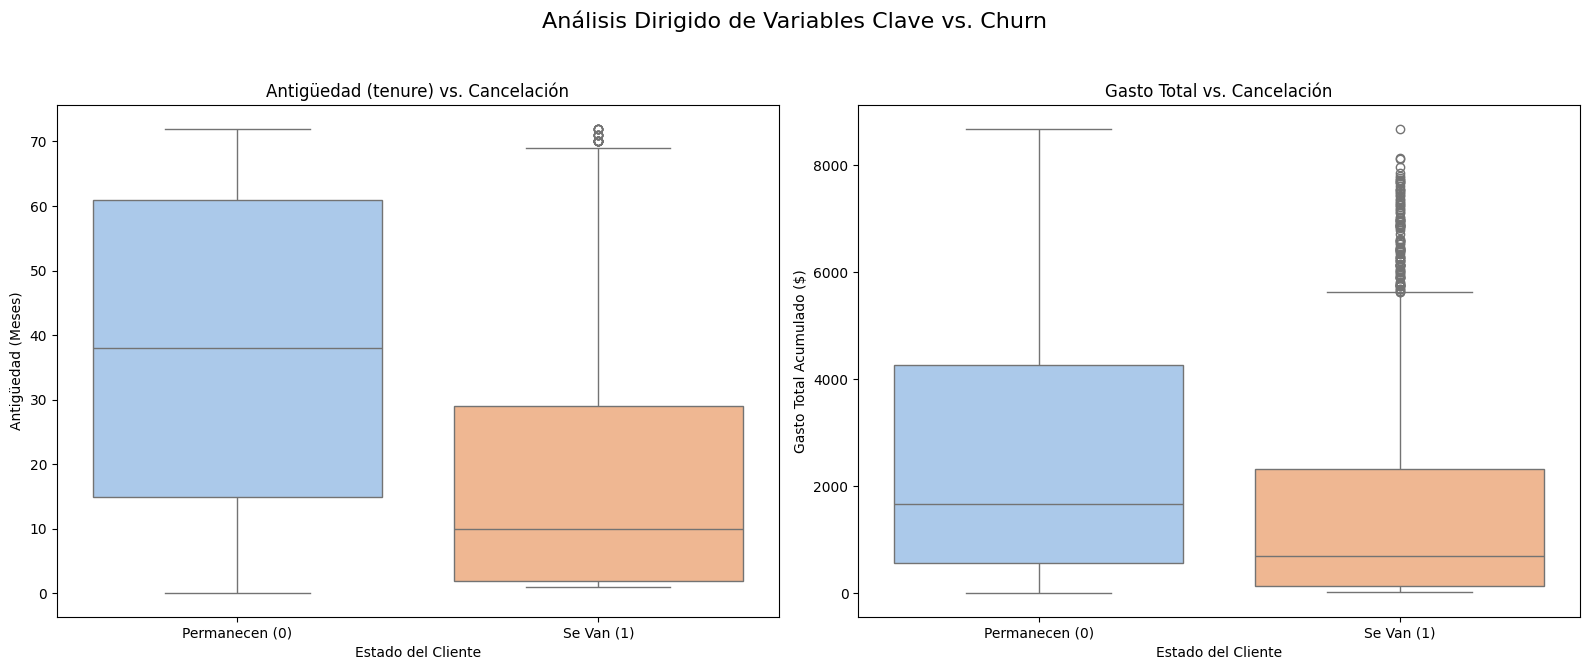

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Análisis Dirigido de Variables Clave vs. Churn', fontsize=16)

# Boxplot para Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df_encoded, ax=axes[0], palette='pastel')
axes[0].set_title('Antigüedad (tenure) vs. Cancelación')
axes[0].set_xticklabels(['Permanecen (0)', 'Se Van (1)'])
axes[0].set_xlabel("Estado del Cliente")
axes[0].set_ylabel("Antigüedad (Meses)")


# Boxplot para Charges.Total vs Churn
sns.boxplot(x='Churn', y='Charges.Total', data=df_encoded, ax=axes[1], palette='pastel')
axes[1].set_title('Gasto Total vs. Cancelación')
axes[1].set_xticklabels(['Permanecen (0)', 'Se Van (1)'])
axes[1].set_xlabel("Estado del Cliente")
axes[1].set_ylabel("Gasto Total Acumulado ($)")


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### 💡Análisis:

Los gráficos confirman visualmente mi hipótesis. 
Los clientes que se van (`Churn=1`) tienen una antigüedad (`tenure`) mucho menor (la caja es más baja y compacta) y, en consecuencia, un gasto total (`Charges.Total`) acumulado también mucho menor que los clientes que permanecen en la compañía.

## 🤖 3. Modelado Predictivo

### 🎯 3.1. Separación de Datos

**Objetivo**: Dividir el conjunto de datos (que ya fue balanceado con SMOTE) en un subconjunto para entrenar los modelos y otro para probar su rendimiento.

**Método**: Utilizare la función `train_test_split` de la librería `Scikit-learn` y asignare un `80%` de los datos para el conjunto de **entrenamiento** y el `20%` restante para el conjunto de **prueba** y un random_state para asegurar que la división sea siempre la misma si  se vuelve a ejecutar el código.

**Justificación**: Este es un paso fundamental y obligatorio en el machine learning para evitar el overfitting (sobreajuste).

In [24]:
# Recordemos que los datos balanceados son X_resampled y y_resampled
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.20,
    random_state=42
)

print("Datos divididos en conjuntos de entrenamiento y prueba.")
print("Dimensiones del conjunto de entrenamiento (X_train):", X_train.shape)
print("Dimensiones del conjunto de prueba (X_test):", X_test.shape)

Datos divididos en conjuntos de entrenamiento y prueba.
Dimensiones del conjunto de entrenamiento (X_train): (8278, 31)
Dimensiones del conjunto de prueba (X_test): (2070, 31)


### 🎯 3.2. Creación de Modelos

#### 🤖 Modelo 1: Regresión Logística (con Estandarización)

**Objetivo**: Crear, entrenar y evaluar un modelo de Regresión Logística para predecir la evasión de clientes.

**Método**: 
1. Utilizare un `Pipeline` de `Scikit-learn` para encadenar los pasos de **preprocesamiento** y **modelado**.

2. El `pipeline` constará de dos etapas: `StandardScaler()` para estandarizar los datos y `LogisticRegression()` para el modelo de clasificación.

3. Entrenare el `pipeline` completo con los datos de entrenamiento (`X_train`, `y_train`) y realizare predicciones en los datos de prueba (`X_test`).

4. Finalmente, generare el `classification_report` y la `confusion_matrix` para evaluar el rendimiento.

**Justificación**: La **Regresión Logística** es un modelo sensible a la escala de las características. La **estandarización** (`StandardScaler`) es un paso que asegura que todas las variables contribuyan de manera justa al modelo y el uso de un `Pipeline` es una buena práctica porque aplica la estandarización aprendiendo de los datos de entrenamiento y luego transformando los de prueba.

--- Entrenando Modelo: Regresión Logística ---
Modelo entrenado.

--- Evaluación del Modelo: Regresión Logística ---

Reporte de Clasificación:
                precision    recall  f1-score   support

Permanecen (0)       0.80      0.82      0.81      1027
    Se Van (1)       0.82      0.80      0.81      1043

      accuracy                           0.81      2070
     macro avg       0.81      0.81      0.81      2070
  weighted avg       0.81      0.81      0.81      2070


Matriz de Confusión:


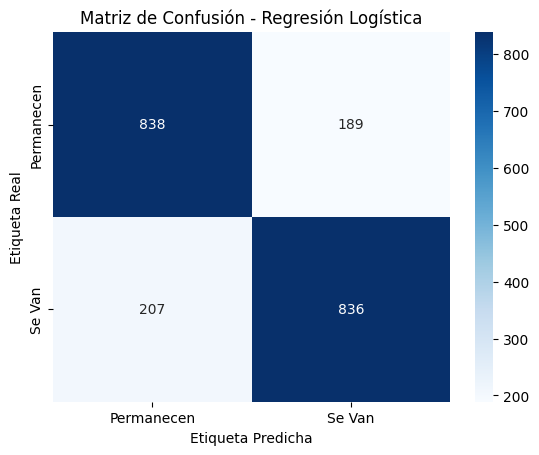

In [25]:
from sklearn.pipeline import Pipeline

# 1. Pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

# 2. Entrenar el pipeline
print("--- Entrenando Modelo: Regresión Logística ---")
pipeline_lr.fit(X_train, y_train)
print("Modelo entrenado.")

# 3. Predicciones en el conjunto de prueba
y_pred_lr = pipeline_lr.predict(X_test)

# 4. Evaluación del modelo
print("\n--- Evaluación del Modelo: Regresión Logística ---")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr, target_names=['Permanecen (0)', 'Se Van (1)']))

print("\nMatriz de Confusión:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Permanecen', 'Se Van'], 
            yticklabels=['Permanecen', 'Se Van'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

#### 🤖 Modelo 2: Random Forest (sin Estandarización)

**Objetivo**: Crear, entrenar y evaluar un modelo de Random Forest para predecir la evasión de clientes.

**Método**: 
1. Se instanciará el clasificador `RandomForestClassifier`.

2. Entrenare directamente con los datos de entrenamiento originales (`X_train`, `y_train`).

3. Eealizare predicciones en los datos de prueba (`X_test`).

4. Generare visual de el `classification_report` y la `confusion_matrix`.

**Justificación**: `Random Forest` es un modelo **basado en ensambles de árboles de decisión**. Como los árboles toman decisiones dividiendo una característica a la vez, **no son sensibles a la escala de los datos**. Por lo tanto, **no requiere estandarización**, lo que simplifica el preprocesamiento.


--- Entrenando Modelo: Random Forest ---
Modelo entrenado.

--- Evaluación del Modelo: Random Forest ---

Reporte de Clasificación:
                precision    recall  f1-score   support

Permanecen (0)       0.84      0.85      0.84      1027
    Se Van (1)       0.85      0.84      0.85      1043

      accuracy                           0.84      2070
     macro avg       0.84      0.84      0.84      2070
  weighted avg       0.84      0.84      0.84      2070


Matriz de Confusión:


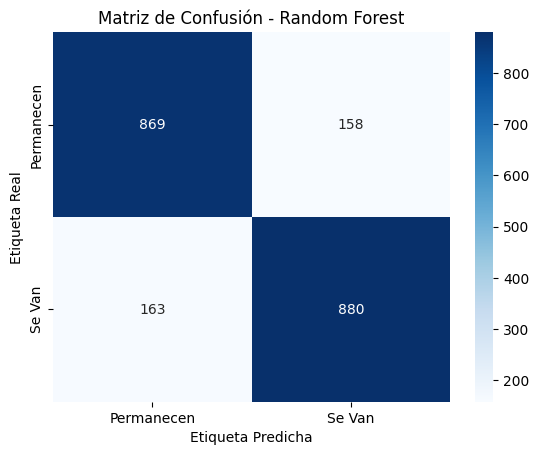

In [26]:
# 1. Random Forest
model_rf = RandomForestClassifier(random_state=42)

# 2. Entrenamiento 
print("\n--- Entrenando Modelo: Random Forest ---")
model_rf.fit(X_train, y_train)
print("Modelo entrenado.")

# 3. Predicciones
y_pred_rf = model_rf.predict(X_test)

# 4. Evaluacion
print("\n--- Evaluación del Modelo: Random Forest ---")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf, target_names=['Permanecen (0)', 'Se Van (1)']))

print("\nMatriz de Confusión:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Permanecen', 'Se Van'], 
            yticklabels=['Permanecen', 'Se Van'])
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

### 🎯 3.3. Evaluación de los Modelos

**Objetivo**: Realizar un análisis crítico y comparativo del rendimiento de los modelos de `Regresión Logística` y `Random Forest` para seleccionar el más adecuado para el problema de negocio.

**Método**: Debo analizarán y comparar las métricas clave (`Exactitud`, `Precisión`, `Recall` y `F1-score`) obtenidas de los reportes de clasificación.

**Justificación**: Una comparación estructurada es fundamental para tomar una decisión basada en evidencia.

#### 💡 Análisis Crítico y Comparación

1. ***¿Cuál modelo tuvo el mejor desempeño?***

* El modelo de Regresión Logística es el ganador, supera al modelo de Regresión Logística en todas las métricas evaluadas:

    * Tiene una mayor exactitud general (`84%` vs. `81%`).

    * Es más preciso en sus predicciones de churn (`85%` vs. `82%`).

    * Y lo más importante, tiene un mayor Recall (`84%` vs. `80%`), lo que significa que es capaz de identificar correctamente al `84%` de todos los clientes que realmente cancelaron el servicio.

2. ¿Algún modelo presentó overfitting o underfitting?

    * Ambos modelos muestran un rendimiento balanceado en las clases "`Permanecen`" y "`Se Van`", con métricas `F1-score` muy similares para ambas (`0.81` y `0.81` para `Regresión Logística`, `0.84` y `0.85` para Random Forest). Esto podria demostar que que la estrategia de balanceo con SMOTE fue efectiva y los modelos no están simplemente ignorando a la clase minoritaria.

    * El Random Forest obtiene una exactitud del `84%` en el conjunto de prueba, lo que indica que está generalizando bien a datos no vistos. Sin tener la puntuación del conjunto de entrenamiento para comparar, no podemos descartar por completo un leve sobreajuste.

**Conclusión de la Evaluación**: El modelo `Random Forest` es superior en todos los aspectos evaluados y es la mejor elección para este problema.

## 📝 4. Interpretación y Conclusiones

### 🎯 4.1. Análisis de la Importancia de las Variables (Random Forest)

**Objetivo**: Identificar y visualizar las características (`features`) que el modelo Random Forest consideró más influyentes para predecir la evasión de clientes.

**Método**: 

1. Accedere al atributo `.feature_importances_` del modelo `model_rf` ya entrenado.

2. Creare un DataFrame para asociar cada característica con su puntuación de importancia.

3. Hare la visualizacion de las 15 características más importantes utilizando un gráfico de barras horizontal de `Plotly`.

**Justificación**: Este paso es fundamental para la interpretabilidad del modelo. Nos permite entender el "por qué" detrás de sus predicciones.

In [27]:
# .feature_importances_
importances_rf = model_rf.feature_importances_
feature_names_rf = X_train.columns 

# DataFrame para la visualización
feature_importance_df_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': importances_rf})

# Top 15
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False).head(15)

# Gráfico de barras
fig = px.bar(feature_importance_df_rf,
             x='Importance',
             y='Feature',
             orientation='h',
             title='Top 15 Características Más Importantes para el Modelo (Random Forest)')
fig.update_layout(yaxis={'categoryorder':'total ascending'}) # Ordena las barras de menor a mayor
fig.show()

#### 💾 Guardar el modelo final para su futuro uso

In [28]:
import pickle

with open('modelo_churn_random_forest.pkl', 'wb') as file:
    pickle.dump(model_rf, file)

print("Modelo guardado exitosamente con pickle en 'modelo_churn_random_forest.pkl'")

Modelo guardado exitosamente con pickle en 'modelo_churn_random_forest.pkl'


### 🎯 4.2. Conclusión Final del Proyecto

#### ✅ Informe Detallado

A lo largo de este proyecto, mi objetivo ha sido desentrañar las causas de la alta tasa de evasión de clientes en Telecom X. Inicié con un conjunto de datos complejo y semi-estructurado, y a través de un riguroso proceso de limpieza, análisis exploratorio y modelado predictivo, he llegado a conclusiones claras y accionables.

Este informe final resume los hallazgos más importantes de mi investigación y presenta una serie de recomendaciones estratégicas basadas en la evidencia encontrada en los datos.

#### 🗒️ Resumen de Hallazgos: Del Análisis a la Predicción

Mi análisis exploratorio inicial (EDA) reveló patrones muy marcados. Identifiqué que factores como el **tipo de contrato**, la **antigüedad del cliente (`tenure`)**, el **tipo de servicio de internet** y el **método de pago** parecían tener una fuerte influencia en la decisión de un cliente de cancelar el servicio.

Posteriormente, durante este segunda parte desarrollé un modelo de **Random Forest**, el cual demostró un rendimiento predictivo robusto. Lo más revelador es que el análisis de importancia de variables de este modelo **confirmó cuantitativamente mis hallazgos del EDA**. Las características que el modelo consideró más influyentes para sus predicciones fueron, en orden de importancia:
1.  **Gasto Total (`Charges.Total`)** 
2.  **Antigüedad (`tenure`)**
3.  **Gasto Mensual (`Charges.Monthly`)**
4.  **Tipo de Contrato (`PaymentMethod_electronic check`)**

Esta alineación entre el análisis visual y el resultado del modelo de machine learning me da una gran confianza en la validez de nuestras conclusiones.

#### 📈 Rendimiento del Modelo Predictivo

El modelo de **Random Forest** que seleccioné demostró ser altamente eficaz. En el conjunto de datos de prueba, alcanzó una **exactitud general del 84%**.

Sin embargo, la métrica más importante para nuestro objetivo de negocio es el **Recall** para la clase "Churn", que fue del **84%**. Esto significa que, de cada 100 clientes que realmente planean cancelar su servicio, nuestro modelo es capaz de **identificar correctamente a 84 de ellos**. Esta capacidad de detección proactiva es una herramienta muy poderosa para cualquier estrategia de retención.

#### 📉 Factores Clave que Afectan la Cancelación

Basado en la síntesis del análisis exploratorio y la interpretabilidad del modelo, he identificado tres pilares principales que impulsan la evasión de clientes:

1.  **Falta de Compromiso a Largo Plazo**: Este es el factor más fuerte. Los clientes con contratos **Mes a Mes** son, por un amplio margen, los más propensos a irse. La baja antigüedad (`tenure`) es el segundo predictor más importante, lo que refuerza la idea de que los clientes nuevos y sin ataduras son los más volátiles.

2.  **Relación Costo-Beneficio del Servicio**: Los clientes con **Fibra Óptica**, a pesar de ser un servicio premium, muestran una alta tasa de evasión, probablemente ligada a un **Gasto Mensual** más elevado. Crucialmente, la falta de servicios de valor añadido como el **Soporte Técnico** y la **Seguridad en Línea** debilita la propuesta de valor y deja a estos clientes más expuestos a la competencia.

3.  **Fricción en los Procesos**: La alta tasa de cancelación entre los usuarios de **Cheque Electrónico** sugiere que los procesos de pago manuales o poco eficientes son un punto de fricción significativo que puede llevar a un cliente a abandonar el servicio.

#### 💡 Estrategias de Retención Propuestas

Basado en esta evidencia, propongo un plan de acción de tres niveles:

1.  **Estrategia Focalizada - "Ancla al Cliente"**:
    * **Acción**: Lanzar campañas de marketing dirigidas específicamente a los clientes de "Mes a Mes" que se encuentran en sus primeros 12 meses de servicio. La oferta debería centrarse en los beneficios de migrar a un contrato de **1 o 2 años**, como una tarifa mensual reducida o la inclusión de un servicio de streaming de forma gratuita.

2.  **Estrategia Preventiva - "Aumenta el Valor Percibido"**:
    * **Acción**: Para todos los nuevos clientes que contraten **Fibra Óptica**, incluir el paquete de **Soporte Técnico** y **Seguridad en Línea** de forma gratuita durante los primeros 3-6 meses. Esto no solo mejora la experiencia inicial, sino que "engancha" al cliente a servicios que hemos demostrado que aumentan la retención.

3.  **Estrategia Operacional - "Elimina la Fricción"**:
    * **Acción**: Investigar y rediseñar el flujo de pago con Cheque Electrónico para hacerlo más sencillo. Al mismo tiempo, crear una campaña de incentivos (ej. un pequeño descuento único en la próxima factura) para motivar a los clientes a cambiar a métodos de pago automáticos, como la domiciliación bancaria o la tarjeta de crédito.

Este análisis demuestra que la evasión de clientes no es un evento aleatorio, sino un resultado predecible de factores medibles. Con los insights y el modelo predictivo que he desarrollado, Telecom X está ahora en una posición mucho más fuerte para entender, anticipar y reducir la pérdida de sus valiosos clientes.